In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [8]:

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score 


In [2]:
final_best = pd.read_csv("final_best.csv")
final_best.drop("Documentary", axis =1, inplace =True)
final_best = pd.concat([final_best,pd.get_dummies(final_best['Date'])], axis=1)
final_best.head()

,year_film,year_ceremony,ceremony,category,name,film,win,Gross,Date,Runtime,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1976,1977,49,BEST PICTURE,Walter Coblenz Producer,All the Presidents Men,False,7.060000e+07,Apr,138,...,0,0,0,0,0,0,0,0,0,0
1,1976,1977,49,BEST PICTURE,Robert F Blumofe and Harold Leventhal Producers,Bound for Glory,False,5.986694e+07,Dec,147,...,1,0,0,0,0,0,0,0,0,0
2,1976,1977,49,BEST PICTURE,Howard Gottfried Producer,Network,False,2.368988e+07,Nov,121,...,0,0,0,0,0,0,0,1,0,0
3,1976,1977,49,BEST PICTURE,Irwin Winkler and Robert Chartoff Producers,Rocky,True,1.172351e+08,Dec,120,...,1,0,0,0,0,0,0,0,0,0
4,1976,1977,49,BEST PICTURE,Michael Phillips and Julia Phillips Producers,Taxi Driver,False,2.826257e+07,Feb,114,...,0,1,0,0,0,0,0,0,0,0


In [3]:
final_best.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 49 columns):
year_film        254 non-null int64
year_ceremony    254 non-null int64
ceremony         254 non-null int64
category         254 non-null object
name             254 non-null object
film             254 non-null object
win              254 non-null bool
Gross            254 non-null float64
Date             254 non-null object
Runtime          254 non-null int64
Awards           254 non-null float64
nominations      254 non-null float64
imdb             254 non-null float64
tomato           254 non-null float64
Metacr           254 non-null float64
imdbVotes        254 non-null float64
Thriller         254 non-null float64
Short            254 non-null float64
Comedy           254 non-null float64
Fantasy          254 non-null float64
Animation        254 non-null float64
Mystery          254 non-null float64
Music            254 non-null float64
Biography        254 non-null float6

In [4]:
final_best['win'] = final_best['win'].apply(lambda x : 1 if (x == True) else 0)

In [5]:
final_best.head()

,year_film,year_ceremony,ceremony,category,name,film,win,Gross,Date,Runtime,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1976,1977,49,BEST PICTURE,Walter Coblenz Producer,All the Presidents Men,0,7.060000e+07,Apr,138,...,0,0,0,0,0,0,0,0,0,0
1,1976,1977,49,BEST PICTURE,Robert F Blumofe and Harold Leventhal Producers,Bound for Glory,0,5.986694e+07,Dec,147,...,1,0,0,0,0,0,0,0,0,0
2,1976,1977,49,BEST PICTURE,Howard Gottfried Producer,Network,0,2.368988e+07,Nov,121,...,0,0,0,0,0,0,0,1,0,0
3,1976,1977,49,BEST PICTURE,Irwin Winkler and Robert Chartoff Producers,Rocky,1,1.172351e+08,Dec,120,...,1,0,0,0,0,0,0,0,0,0
4,1976,1977,49,BEST PICTURE,Michael Phillips and Julia Phillips Producers,Taxi Driver,0,2.826257e+07,Feb,114,...,0,1,0,0,0,0,0,0,0,0


In [6]:
final_best.columns

Index(['year_film', 'year_ceremony', 'ceremony', 'category', 'name', 'film',
       'win', 'Gross', 'Date', 'Runtime', 'Awards', 'nominations', 'imdb',
       'tomato', 'Metacr', 'imdbVotes', 'Thriller', 'Short', 'Comedy',
       'Fantasy', 'Animation', 'Mystery', 'Music', 'Biography', 'Drama',
       'Western', 'Sci-Fi', 'Musical', 'History', 'Action', 'Crime', 'Romance',
       'Family', 'Adventure', 'Sport', 'Horror', 'War', 'Apr', 'Aug', 'Dec',
       'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep'],
      dtype='object')

## Train_data, Train_label 분리

In [6]:

train_data = final_best.drop(["win","year_film","year_ceremony","ceremony","category","name","film","Date"],axis=1)
train_label = final_best["win"]


## 연속형 변수 StandardScaler로 평균 0, 표준편차 1 이 되는 값으로 변경 

스케일링  
스케일링은 자료 집합에 적용되는 전처리 과정으로 모든 자료에 선형 변환을 적용하여 전체 자료의 분포를 평균 0, 분산 1이 되도록   만드는 과정이다.스케일링은 자료의 오버플로우(overflow)나 언더플로우(underflow)를 방지하고 독립 변수의 공분산 행렬의 조건수  (condition number)를 감소시켜 최적화 과정에서의 안정성 및 수렴 속도를 향상시킨다.  
  

scikit-learn에서는 다음과 같은 스케일링 클래스를 제공한다.  
  
* StandardScaler(X): 평균이 0과 표준편차가 1이 되도록 변환.  
* RobustScaler(X): 중앙값(median)이 0, IQR(interquartile range)이 1이 되도록 변환.  
* MinMaxScaler(X): 최대값이 각각 1, 최소값이 0이 되도록 변환.  
* MaxAbsScaler(X): 0을 기준으로 절대값이 가장 큰 수가 1또는 -1이 되도록 변환.  

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()

train_data[['Gross', 'Runtime', 'nominations', 'imdb', 'tomato', 'Metacr', 'imdbVotes']] = scaler.fit_transform(train_data[['Gross', 'Runtime', 'nominations', 'imdb', 'tomato', 'Metacr', 'imdbVotes']])
train_data

,Gross,Runtime,Awards,nominations,imdb,tomato,Metacr,imdbVotes,Thriller,Short,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,-0.217217,0.389799,13.0,-0.887770,0.635889,0.547883,-0.019685,-0.645448,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,-0.320594,0.740617,4.0,-1.022498,-0.854225,-0.252807,-0.988183,-0.889990,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
2,-0.669039,-0.272859,16.0,-0.820407,0.848762,0.433499,0.270865,-0.537342,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
3,0.231958,-0.311839,17.0,-0.887770,0.848762,0.662267,-0.988183,0.404938,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
4,-0.624997,-0.545718,21.0,-0.968607,1.274509,1.005420,1.336213,0.890386,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,-0.566203,-0.350819,177.0,3.086696,-0.215605,0.547883,0.948813,-0.511057,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
250,-0.077748,0.077960,53.0,0.270887,1.061636,-1.167882,-1.085033,-0.155183,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
251,-0.320594,0.272859,248.0,1.537327,-0.002732,-0.270547,1.529912,-0.573765,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
252,1.176379,0.311839,92.0,2.493894,-0.002732,0.204730,0.755114,-0.110296,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0


## train_test_split 을 이용하여 train, test set분리

In [ ]:
from sklearn.model_selection import train_test_split

In [38]:


X_train, X_test, y_train, y_test = train_test_split(train_data, train_label, test_size =0.25, random_state=123, stratify = train_label)

# stratify : train_label의 비율을 살려 테스트와 트레인 부분을 나눈다. 

## SMOTE 를 이용. 비대칭 데이터 문제를 해결하기 위한 오버샘플링
SMOTE : 기존의 소수의 값 주변의 값들로 데이터 생성  

### 언더 샘플링
* RandomUnderSampler: random under-sampling method
* TomekLinks: Tomek’s link method
* CondensedNearestNeighbour: condensed nearest neighbour method
* OneSidedSelection: under-sampling based on one-sided selection method
* EditedNearestNeighbours: edited nearest neighbour method
* NeighbourhoodCleaningRule: neighbourhood cleaning rule

### 오버 샘플링
* RandomOverSampler: random sampler
* ADASYN: Adaptive Synthetic Sampling Approach for Imbalanced Learning  
* SMOTE: Synthetic Minority Over-sampling Technique

###  복합 샘플링
* SMOTEENN: SMOTE + ENN
* SMOTETomek: SMOTE + Tomek

In [11]:
from imblearn.over_sampling import SMOTE

Using TensorFlow backend.


In [39]:
smote = SMOTE(random_state=0)
X_train_over, y_train_over = smote.fit_sample(X_train,y_train)

In [40]:
len(X_train_over)


316

In [141]:
y_train_over.value_counts()


1    158
0    158
Name: win, dtype: int64

In [143]:
y_test.value_counts()

0    53
1    11
Name: win, dtype: int64

## StratifiedKFold를 이용하여 비율에 맞게 데이터를 나눈다. 

일반적으로 회귀에는 기본 k-겹 교차검증을 사용하고, 분류에는 StratifiedKFold를 사용한다. 파라미터 찾을때 사용

In [100]:
from sklearn.model_selection import StratifiedKFold

In [192]:
skf = StratifiedKFold(n_splits=10)

## Decision Tree

In [41]:
from sklearn.tree import DecisionTreeClassifier

In [237]:
DTC = DecisionTreeClassifier(max_depth = 4,random_state=1234 )

DTC.fit(X_train_over,y_train_over)

pred = DTC.predict(X_test)

print("f1 score : {0:.4f}".format(f1_score(y_test,pred)))

confusion_matrix(y_test,pred)

f1 score : 0.3590


array([[32, 21],
       [ 4,  7]], dtype=int64)

## GridSearchCV로 최적의 파라미터 찾기 

In [248]:
parameters = {
    "criterion" :[ "entropy"],
    "splitter" :["best"],
    "max_leaf_nodes" :[2,3,4,5],
    "min_samples_leaf" : [1],
    "min_samples_split" : [2]
    
    
}

grid_dt = GridSearchCV(DTC,
                         param_grid=parameters,
                         scoring="f1",
                         cv=skf,
                        n_jobs=-1 )
grid_dt.fit(X_train_over, y_train_over)

pred = grid_dt.predict(X_test)

print("f1 score : {0:.4f}".format(f1_score(y_test,pred)))

confusion_matrix(y_test,pred)

f1 score : 0.3636


array([[28, 25],
       [ 3,  8]], dtype=int64)

In [227]:
grid_dt.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=4,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## Decision Tree 시각화

In [ ]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus


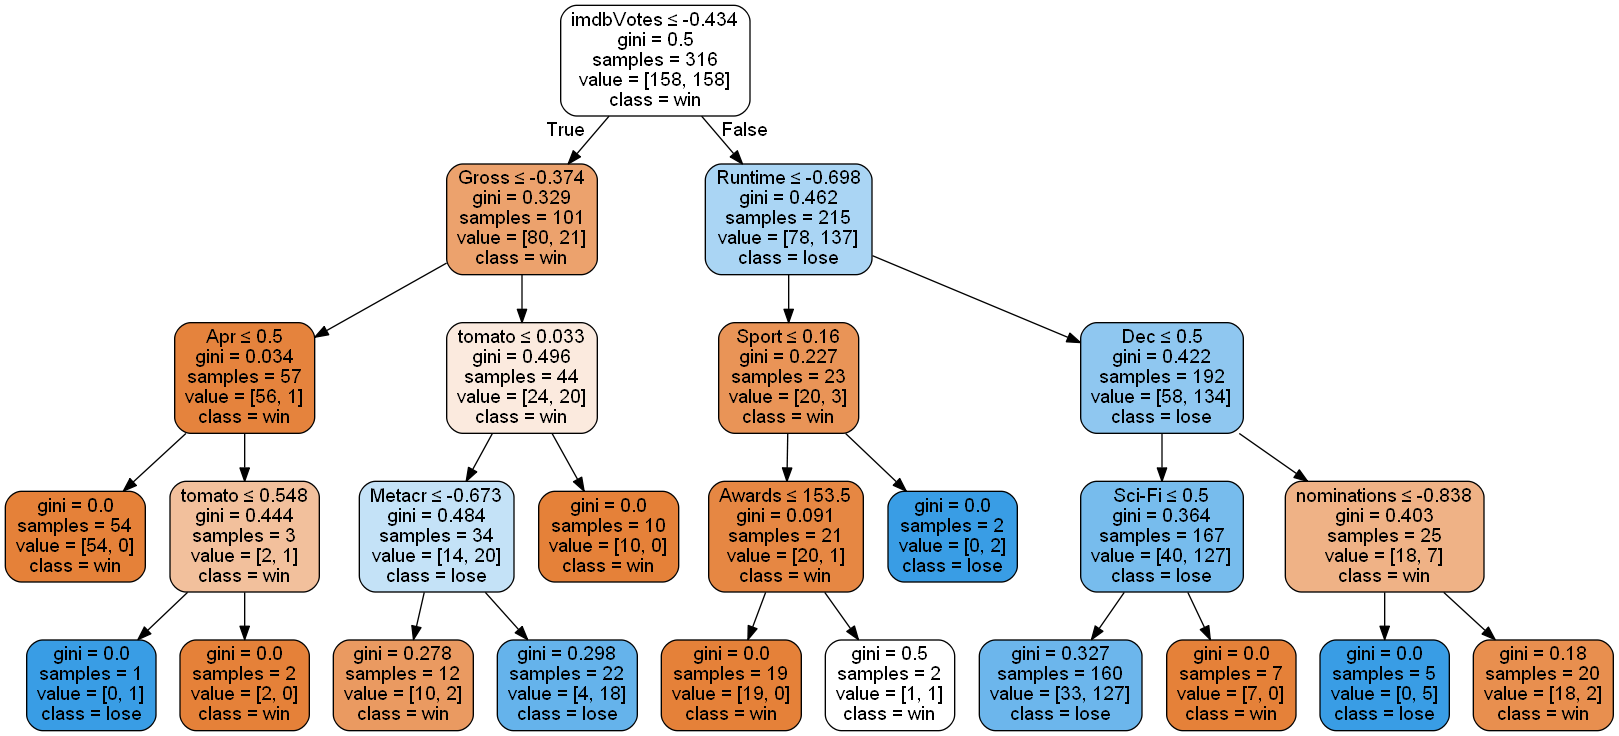

In [238]:

dot_data = StringIO()

export_graphviz(DTC, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                class_names=["win", "lose"],
                 feature_names=X_train.columns
              )

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## plot 한글 패치

In [34]:
%matplotlib inline

import os
from matplotlib import font_manager as fm, rcParams
import matplotlib.pyplot as plt
import matplotlib as mpl

In [35]:
fm.get_fontconfig_fonts()
# font_location = '/usr/share/fonts/truetype/nanum/NanumGothicOTF.ttf'
font_location = 'C:/Windows/Fonts/NanumGothic.ttf' # For Windows
font_name = fm.FontProperties(fname=font_location).get_name()
mpl.rc('font', family=font_name)


## Decision Tree 특성 중요도 plot

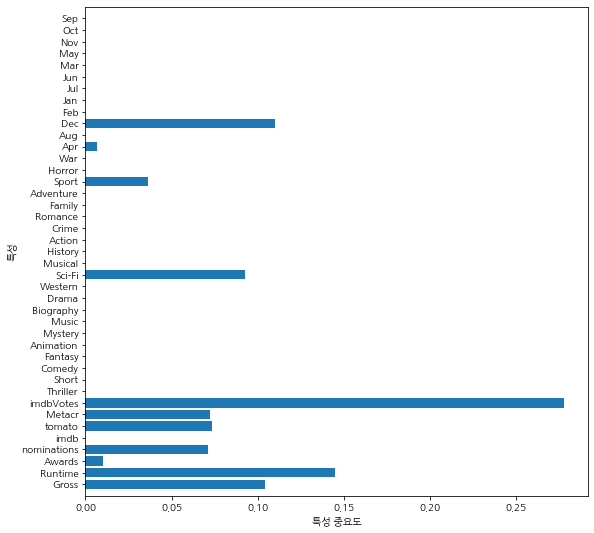

In [239]:
def plot_feature_importances_final_best(model):
    plt.figure(figsize=(9, 9))
    n_features = X_train.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_features)

plot_feature_importances_final_best(DTC)

In [97]:
# Import libraries

from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,learning_curve, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error

from sklearn.linear_model import LassoCV,ElasticNetCV,Lasso,ElasticNet
from sklearn.kernel_ridge import KernelRidge


# 아래 추가적인 패키지가 설치가 되어 있어야 함!!!!!!!
from xgboost import XGBRegressor
from mlxtend.regressor import StackingRegressor


# 시간
import time

머신러닝에는 앙상블(emsemble)모델이 있다.
크게 3종류로 나눌 수 있다. 

* Bagging
* Boosting
* Voting

## XGBC(XGBClassifier)

Gradient Boosting(경사하강법)의 단점을 보완한 부스터   
CART(Classification and Regresstion Tree)기반 : 분류와 회귀 둘다 가능하다. 

일반 파라미터 : 도구 모양을 결정하는 파라미터. linear or tree
* booster : ['gbtree', 'gblinear', 'dart']
* nthread
* num_feature

부스팅 파라미터 : 트리마다 가지를 칠 때 적용하는 옵션. 선택한 booster마다 파라미터가 다름 

학습과정 파라미터 : 최적화 퍼포먼스를 결정하는 파라미터 

커맨드라인 파라미터 : epoch랑 비슷 

xgboost 파라미터 :
https://xgboost.readthedocs.io/en/latest/parameter.html

In [47]:
import xgboost as xgb
from xgboost import XGBClassifier

In [48]:
from sklearn.model_selection import ParameterGrid

In [193]:

XGBC = XGBClassifier(booster = "gbtree",
                     min_child_weight=10,
                     max_depth=3, # 3-10이 기본
                     gamma =0, # 노드가 split 되기 위한 loss function의 값이 감소하는 최소값. 감마가 높을수록 보수적
                     learning_rate=0.1,
                     objective='binary:logistic',
                     scoring='f1',
                     n_jobs=-1, 
                     verbose = 1, 
                     random_state=1234) 
                     

XGBC.fit(X_train_over, y_train_over)

pred= XGBC.predict(X_test)

print("f1 Score : {0:.4f}".format(f1_score(y_test,pred)))

confusion_matrix(y_test,pred)

f1 Score : 0.5806


array([[42, 11],
       [ 2,  9]], dtype=int64)

## XBGC 특성 중요도 Plot

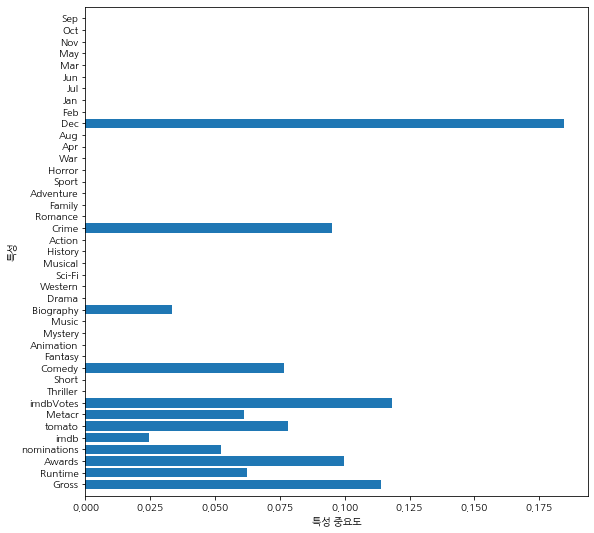

In [198]:
plot_feature_importances_final_best(XGBC)

In [194]:
score = cross_val_score(XGBC,X_train_over ,y_train_over, cv=skf, scoring = 'f1')
score.mean()

0.8281417015169387

In [40]:
XGBC = XGBClassifier( n_jobs=-1)
xgc_param_grid={
    "n_estimators": [10,30,50],
    "booster" :['gbtree', 'gblinear', 'dart'],
    "learning_rate" :[0.1,0.01,0.2, 0.005]
}

In [43]:
n_iter_search = 10
xgb = RandomizedSearchCV(XGBC,
                               param_distributions=xgc_param_grid,
                           cv=skf,
                           scoring='f1',
                           n_jobs=-1, 
                           verbose = 1, 
                           random_state=1234, 
                            n_iter=n_iter_search
                        )
xgb.fit(X_train_over, y_train_over)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  85 out of 100 | elapsed:    1.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.6s finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
                   error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=-1, nthread=None,
                                           objective=...
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, scale_pos_weight=1,
                                           seed=None, silent=None, subsample=1,
                 

In [44]:
parameters = {
    "n_estimators" :[100,50,150, 200,250,300],
    "base_score" :[0.5, 0.1, 1],
    "booster":['gbtree'],
    "learning_rate" : [0.155,0.1, 0.165, 0.175,0.18]
}

In [45]:
grid_xgb = GridSearchCV(XGBC,
                         param_grid=parameters,
                         scoring="f1",
                         cv=skf,
                        n_jobs=-1)
grid_xgb.fit(X_train_over, y_train_over)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=-1,
                                     nthread=None, objective='binar...
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'base_score': [0.5, 0.1, 1], 'booster': ['gbtree'],
                         'learning_r

In [46]:
pred= grid_xgb.predict(X_test)


In [47]:
print("f1 Score : {0:.4f}".format(f1_score(y_test,pred)))

f1 Score : 0.5000


In [48]:
confusion_matrix(y_test,pred)

array([[46,  7],
       [ 5,  6]], dtype=int64)

In [49]:
grid_xgb.best_params_

{'base_score': 0.1,
 'booster': 'gbtree',
 'learning_rate': 0.175,
 'n_estimators': 200}

In [50]:
grid_xgb.best_score_

0.9126983773307302

In [51]:
grid_xgb.best_estimator_

XGBClassifier(base_score=0.1, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.175, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

## Light GBMC(light gradient boosting machine)

XGBoost의 느린 단점을 보완하기 위해 나옴   

다른 Booster의 트리는 level-wise(균형 중심)분할을 이용. depth를 줄이고 균형을 맞춤.  
lightgbm은 leaf-wise(리프 중심)분할. 균형을 맞추지 않고 계속 분할. 비대칭적이고 깊은 트리, 동일한 leaf를 생성할 때 level-wise보다 손실이 적다.   

파라미터 튜닝 : https://lightgbm.readthedocs.io/en/latest/Parameters.html

In [118]:
from lightgbm import LGBMClassifier
import lightgbm as lgb

In [179]:

LGBC = LGBMClassifier(boosting_type='gbdt', 
                      class_weight=None, 
                      colsample_bytree=1.0,
                      importance_type='split', 
                      learning_rate=0.055, 
                      max_depth=-1,
                      min_child_samples=20, 
                      min_child_weight=0.001,
                      min_split_gain=0.0,
                      n_estimators=300, 
                      n_jobs=-1, 
                      num_leaves=31, 
                      objective=None,
                      random_state=1234, 
                      reg_alpha=0.0, 
                      reg_lambda=0.0, 
                      silent=True,
                      subsample=1.0, 
                      subsample_for_bin=200000, 
                      subsample_freq=0)

LGBC.fit(X_train_over, y_train_over)

pred = LGBC.predict(X_test)

print("f1 Score : {0:.4f}".format(f1_score(y_test,pred)))

confusion_matrix(y_test,pred)

f1 Score : 0.5833


array([[47,  6],
       [ 4,  7]], dtype=int64)

## LGBC 특성중요도 Plot

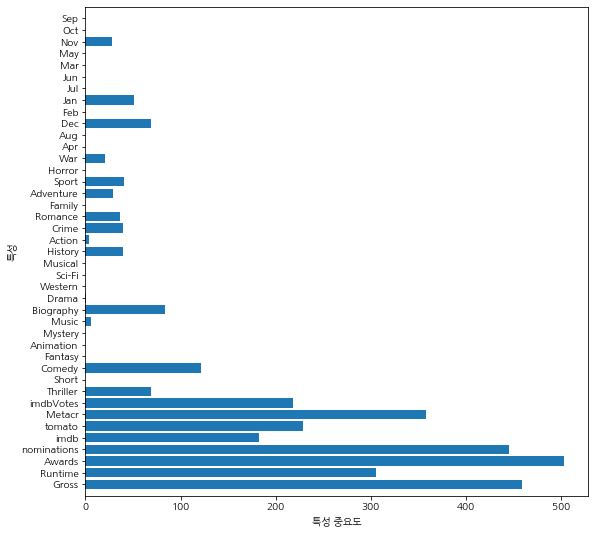

In [199]:
plot_feature_importances_final_best(LGBC)

In [95]:
LGB =LGBMClassifier(random_state =1234, n_jobs=-1)
lb_param_grid={
    "n_estimator":[10,20,30,40],
    "learning_rate":[0.1,0.05,0.01]
    
}

In [98]:
n_iter_search = 10
LGB_clf = RandomizedSearchCV(LGB,
                           param_distributions = lb_param_grid,
                           cv=skf,
                           scoring='f1',
                           n_jobs=-1, 
                           verbose = 1, 
                           random_state=1234, 
                            n_iter=n_iter_search)
LGB_clf.fit(X_train_over, y_train_over)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    6.8s finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
                   error_score=nan,
                   estimator=LGBMClassifier(boosting_type='gbdt',
                                            class_weight=None,
                                            colsample_bytree=1.0,
                                            importance_type='split',
                                            learning_rate=0.1, max_depth=-1,
                                            min_child_samples=20,
                                            min_child_weight=0.001,
                                            min_split_gain=0.0,
                                            n_estimators=100, n_jobs=-1,
                                            num_leaves=31, objective=None,
                                            random_state=1234, reg_alpha=0.0,
                                            reg_lambda=0.0, silent=True,
                                        

In [161]:
parameters = {
    "n_estimators" :[100, 150,200,50, 300,250,400,500],
   "learning_rate":[0.1,0.05,0.15, 0.005,0.15,0.105,0.001,0.0001,0.0005],
    "num_leaves" : [31,127,255,511],
    "min_child_samples" : [20,30,40,50,100]
}


In [162]:
grid_lgb = GridSearchCV(LGB,
                         param_grid=parameters,
                         scoring="f1",
                         cv=skf,
                        n_jobs=-1)
grid_lgb.fit(X_train_over, y_train_over)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             error_score=nan,
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_leaves=31, objective=Non...
                                      subsample=1.0, subsample_for_bin=200000,
                                      subsample_freq=0),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.05, 0.15, 0.005, 0.15, 0.105,
                                           0.001, 0.0001, 0.0005],
             

In [163]:
pred = grid_lgb.predict(X_test)

In [164]:
print("f1 Score : {0:.4f}".format(f1_score(y_test,pred)))

f1 Score : 0.5000


In [165]:
confusion_matrix(y_test,pred)

array([[46,  7],
       [ 5,  6]], dtype=int64)

In [61]:
grid_lgb.best_params_

{'learning_rate': 0.05, 'n_estimators': 200}

In [166]:
grid_lgb.best_estimator_

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.105, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=300, n_jobs=-1, num_leaves=31, objective=None,
               random_state=1234, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [63]:
grid_lgb.best_score_

0.9103290700444401

 ##  RFC(RandomForestClassifier)
 
여러 개의 의사결정나무를 만들고, 그들의 다수결로 결과를 결정하는 방법  
classification 과 regression 에 모두 쓸 수 있다. 



In [195]:
from sklearn.ensemble import RandomForestClassifier

In [313]:
RFC =RandomForestClassifier(n_estimators = 100,
                           
                            random_state =1234,
                            n_jobs=-1)

RFC.fit(X_train_over, y_train_over)

pred = RFC.predict(X_test)

print("f1 Score : {0:.4f}".format(f1_score(y_test,pred)))

confusion_matrix(y_test,pred)

f1 Score : 0.2353


array([[49,  4],
       [ 9,  2]], dtype=int64)

## RFC 특성 중요도 Plot

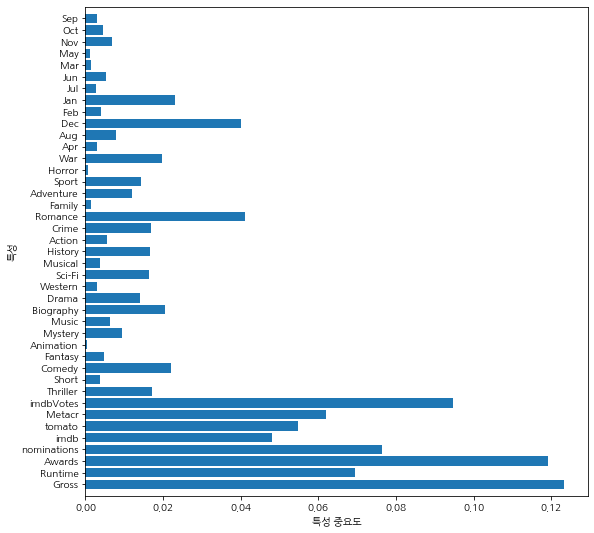

In [314]:
plot_feature_importances_final_best(RFC)

In [249]:
RF =RandomForestClassifier(random_state =1234, n_jobs=-1)
RF_param_grid={
    "n_estimators":[20,30,40,50],
    "max_features":[1,2,3,4,5,6],
    "min_samples_split" :[2,3,4,5],
    "min_samples_leaf" : [1,2,3,4,5]
   
}

In [250]:
n_iter_search = 10
rf = RandomizedSearchCV(RF,
                           param_distributions=RF_param_grid,
                           cv=skf,
                           scoring='f1',
                           n_jobs=-1, 
                           verbose = 1, 
                           random_state=1234, 
                            n_iter=n_iter_search)
rf.fit(X_train_over, y_train_over)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.2s finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
                   error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_s...
                     

In [304]:
parameters = {
    "n_estimators" :[10,20,25,30],
   
    "min_samples_leaf" : [1],
    "min_samples_split" : [2]
  
}

In [305]:
grid_rf = GridSearchCV(RF,
                         param_grid=parameters,
                         scoring="f1",
                         cv=skf,
                        n_jobs=-1)
grid_rf.fit(X_train_over, y_train_over)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                          

In [306]:
pred = grid_rf.predict(X_test)

In [307]:
print("f1 Score : {0:.4f}".format(f1_score(y_test,pred)))

f1 Score : 0.2353


In [308]:
confusion_matrix(y_test,pred)

array([[49,  4],
       [ 9,  2]], dtype=int64)

In [309]:
grid_rf = GridSearchCV(RF,
                         param_grid=parameters,
                         scoring="f1",
                         cv=skf,
                        n_jobs=-1)
grid_rf.fit(X_train_over[list(df.loc[:7,'ft'])], y_train_over)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                          

In [310]:
pred = grid_rf.predict(X_test[list(df.loc[:7,'ft'])])

In [311]:
print("f1 Score : {0:.4f}".format(f1_score(y_test,pred)))

f1 Score : 0.3200


In [312]:
confusion_matrix(y_test,pred)

array([[43, 10],
       [ 7,  4]], dtype=int64)

In [82]:
grid_rf.best_score_

0.9427244524398223

## 특성 중요도 top 7으로만 RFC 돌리기

In [275]:
df = pd.DataFrame()

In [277]:
df['import']= grid_rf.best_estimator_.feature_importances_

In [278]:
df['ft']  = X_train_over.columns
df.sort_values('import', ascending=False, inplace = True)
df.reset_index(inplace=True)
df

,index,ft,import
0,0,Gross,0.133832
1,2,Awards,0.119335
2,7,imdbVotes,0.111992
3,3,nominations,0.077989
4,6,Metacr,0.066070
5,1,Runtime,0.065751
6,5,tomato,0.048249
7,4,imdb,0.043591
8,31,Dec,0.042249
9,23,Romance,0.026492


In [279]:
df.loc[:7,'ft']

0          Gross
1         Awards
2      imdbVotes
3    nominations
4         Metacr
5        Runtime
6         tomato
7           imdb
Name: ft, dtype: object

In [315]:
RFC =RandomForestClassifier(n_estimators = 25,
                           
                            random_state =1234,
                            n_jobs=-1)

RFC.fit(X_train_over[list(df.loc[:7,'ft'])], y_train_over)

pred = RFC.predict(X_test[list(df.loc[:7,'ft'])])

print("f1 Score : {0:.4f}".format(f1_score(y_test,pred)))

confusion_matrix(y_test,pred)

f1 Score : 0.3704


array([[42, 11],
       [ 6,  5]], dtype=int64)

## Soft Vector Machine(SVM)

In [38]:
from sklearn.svm import SVC

In [168]:
svm = SVC(random_state =1234)
svm_param_grid={
    "C":[1,5,10,15],
    "kernel":["linear"]
   
}

NameError: name 'SVC' is not defined

In [ ]:
n_iter_search = 10
svm_clf = RandomizedSearchCV(svm,
                           param_distributions=svm_param_grid,
                           cv=skf,
                           scoring='accuracy',
                           n_jobs=-1, 
                           verbose = 1, 
                           random_state=1234, 
                            n_iter=n_iter_search)
svm_clf.fit(X_train, y_train)

C:\Users\1-16\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 4 candidates, totalling 20 fits


In [ ]:
parameters = {
    "n_estimators" :[80, 100, 120],
   "learning_rate":[0.1,0.15, 0.05]
}

In [ ]:
grid_svm = GridSearchCV(svm,
                         param_grid=parameters,
                         scoring="accuracy",
                         cv=skf,
                        n_jobs=-1)
grid_svm.fit(X_train, y_train)

In [ ]:
svm = grid_svm.predict(X_test)

In [ ]:
grid_svm.best_score_

In [ ]:
grid_svm.best_estimator_

In [ ]:
grid_svm.best_params_

In [49]:
total_avg = (xgb+ lgb+ rf)/3
atotal_avg

array([False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False,  True, False,
       False, False, False,  True, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

## voting

In [323]:

x_test_model_total=X_test.copy(deep=True)
x_test_model_total["rfc"]=RFC.predict(X_test[list(df.loc[:7,'ft'])])
x_test_model_total["xgbc"]=XGBC.predict(X_test)
x_test_model_total["lgbmc"]=LGBC.predict(X_test)
x_test_model_total["dt"]=DTC.predict(X_test)
x_test_model_total["ensemble"]=x_test_model_total.loc[:,["rfc","xgbc","lgbmc","dt"]].apply(lambda x: vote_func(x), axis=1)
x_test_model_total

,Gross,Runtime,Awards,nominations,imdb,tomato,Metacr,imdbVotes,Thriller,Short,...,Mar,May,Nov,Oct,Sep,rfc,xgbc,lgbmc,dt,ensemble
80,-0.294762,-0.623678,21.0,-0.550951,-1.067099,0.662267,0.948813,-0.771833,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,-0.669039,-0.272859,16.0,-0.820407,0.848762,0.433499,0.270865,-0.537342,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
239,0.930307,-0.857557,64.0,1.887619,0.423015,0.547883,1.336213,0.421021,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
72,1.198940,-0.038980,16.0,-0.860825,-1.492846,-1.739803,-2.731480,-0.405580,1.0,0.0,...,0,0,0,0,0,0,1,0,1,0
154,-0.353585,-0.974497,95.0,0.136160,-0.854225,0.891036,1.045663,-0.634227,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,-0.424934,-0.350819,28.0,0.351724,-1.067099,0.319114,0.174015,-0.497281,1.0,0.0,...,0,0,0,1,0,0,0,0,0,0
92,0.142322,1.013476,68.0,-0.173714,2.551750,0.433499,1.336213,3.675053,0.0,0.0,...,0,0,0,1,0,0,1,0,1,0
73,-0.255107,1.325315,6.0,-0.955134,-0.215605,-2.311725,-1.956681,-0.001719,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
137,0.007470,0.389799,21.0,0.041850,-0.641352,-0.367192,0.077165,-0.384485,0.0,0.0,...,0,0,1,0,0,1,0,0,1,1


In [318]:
import collections, numpy
def vote_func(x, best_model_idx=0):
    p = collections.Counter(x)
    
    if p.most_common()[0][1] >=2:
        return(p.most_common()[0][0])
    else:
        print("Check!!!! Voting Result!!!")
        return(x[best_model_idx])

In [324]:
x_test_model_total["ensemble"].sum()

17

In [325]:
y_test.sum()

11

11개를 맞춰야 하는데 17개를 맞춤 -> voting안먹힌다

## LogisticRegression

In [137]:
from sklearn.linear_model import LogisticRegression

In [184]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train_over, y_train_over)
pred = lr_clf.predict(X_test)
print("f1 score : {0:.4f}".format(f1_score(y_test,pred)))

f1 score : 0.3571


C:\Users\kse02\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [140]:
lr_clf

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [156]:
lr_clf.coef_[0]

array([ 0.67832075,  0.22210673,  0.02582809, -0.97325476, -0.1824878 ,
       -0.49106622,  0.42838533,  0.61198134, -0.36631254,  0.59317251,
        0.21550069, -1.86737068, -0.42600948, -1.38320363, -0.53618354,
       -0.00569932,  0.18371385,  0.6846954 , -2.39875836,  0.24445668,
        0.29432278,  0.10545991,  0.09570913, -0.65827406, -0.86871237,
       -1.07046186,  1.40963335, -0.19287583,  0.02731673, -0.65895696,
       -1.81812502, -2.31512761, -1.54682677, -1.71445231, -1.48618943,
       -1.49379381, -0.77922696, -0.79931365, -1.03045859, -1.15436975,
       -1.55227036])

In [144]:
df1 = pd.DataFrame()
df1['ft']  = X_train_over.columns

In [159]:
df1['coef']  = lr_clf.coef_[0]

In [178]:
df1.drop(['level_0','index'],axis=1, inplace =True)

In [174]:
df1.sort_values('coef',ascending=False, inplace = True)

In [180]:
X_train_over[list(df1.loc[:9,'ft'])]

,Family,Horror,Sport,Musical,Comedy,History,tomato,Animation,Western,Drama
0,0.0,0.0,0.0,0.0,1.000000,1.000000,-0.024039,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.000000,0.000000,-0.138423,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.000000,0.000000,0.891036,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.000000,0.000000,-0.595960,0.0,1.0,1.0
4,0.0,0.0,0.0,0.0,1.000000,0.000000,0.891036,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
311,0.0,0.0,0.0,0.0,0.095575,0.000000,0.526018,0.0,0.0,1.0
312,0.0,0.0,0.0,0.0,0.000000,0.645785,-0.362504,0.0,0.0,1.0
313,0.0,0.0,0.0,0.0,0.000000,0.000000,0.934111,0.0,0.0,1.0
314,0.0,0.0,0.0,0.0,0.519711,0.000000,-0.179007,0.0,0.0,1.0


In [155]:
X_test[list(df1.loc[:7,'ft'])]

,index,ft,coef
0,26,Sport,1.409633
1,17,Western,0.684695
2,0,Gross,0.678321
3,7,imdbVotes,0.611981
4,9,Short,0.593173
5,6,Metacr,0.428385
6,20,History,0.294323
7,19,Musical,0.244457
8,1,Runtime,0.222107
9,10,Comedy,0.215501


In [185]:
confusion_matrix(y_test,pred)

array([[41, 12],
       [ 6,  5]], dtype=int64)

## DNN

In [16]:
# 3.4 텐서플로 2.0 버전 선택
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass
import tensorflow as tf


In [17]:
import os

In [330]:
X_train, X_test, y_train, y_test

(        Gross   Runtime  Awards  nominations      imdb    tomato    Metacr  \
 220 -0.220493  0.077960    37.0    -0.092877  0.210142 -0.024039  0.077165   
 196 -0.773968 -1.364295    92.0     0.513397 -0.854225 -0.138423  0.561414   
 13  -0.560104 -0.272859    14.0    -0.982080 -0.215605  0.891036 -2.053531   
 71   0.877026  2.065933    44.0    -0.672206  0.635889 -0.595960 -0.794483   
 91  -0.389616 -0.428778    24.0    -0.820407 -1.492846  0.891036  0.077165   
 ..        ...       ...     ...          ...       ...       ...       ...   
 174 -0.089853 -0.740617    76.0     1.011890 -0.641352  0.319114  0.270865   
 108 -0.274844  0.389799    89.0    -0.038986  1.061636  1.234189  0.948813   
 135  2.742074  2.845530   198.0     0.472979  2.551750  0.547883  1.336213   
 15  -0.532907 -0.194899     7.0    -0.982080  0.423015 -0.367192 -0.794483   
 187 -0.590464  0.038980     8.0    -0.860825 -1.705719 -4.828180 -3.312579   
 
      imdbVotes  Thriller  Short  ...  Dec  Feb  J

In [18]:
X_train_over_np= X_train_over.to_numpy()
y_train_over_np =y_train_over.to_numpy()


In [19]:
X_test_np = X_test.to_numpy()
y_test_np = y_test.to_numpy()

In [20]:
type(y_train)

pandas.core.series.Series

In [21]:
y_train_over_np = tf.keras.utils.to_categorical(y_train_over_np, num_classes=2)
y_test_np = tf.keras.utils.to_categorical(y_test_np, num_classes=2)

In [26]:
from keras import backend as K
def recall(y_target, y_pred):
    # clip(t, clip_value_min, clip_value_max) : clip_value_min~clip_value_max 이외 가장자리를 깎아 낸다
    # round : 반올림한다
    y_target_yn = K.round(K.clip(y_target, 0, 1)) # 실제값을 0(Negative) 또는 1(Positive)로 설정한다
    y_pred_yn = K.round(K.clip(y_pred, 0, 1)) # 예측값을 0(Negative) 또는 1(Positive)로 설정한다

    # True Positive는 실제 값과 예측 값이 모두 1(Positive)인 경우이다
    count_true_positive = K.sum(y_target_yn * y_pred_yn) 

    # (True Positive + False Negative) = 실제 값이 1(Positive) 전체
    count_true_positive_false_negative = K.sum(y_target_yn)

    # Recall =  (True Positive) / (True Positive + False Negative)
    # K.epsilon()는 'divide by zero error' 예방차원에서 작은 수를 더한다
    recall = count_true_positive / (count_true_positive_false_negative + K.epsilon())

    # return a single tensor value
    return recall


def precision(y_target, y_pred):
    # clip(t, clip_value_min, clip_value_max) : clip_value_min~clip_value_max 이외 가장자리를 깎아 낸다
    # round : 반올림한다
    y_pred_yn = K.round(K.clip(y_pred, 0, 1)) # 예측값을 0(Negative) 또는 1(Positive)로 설정한다
    y_target_yn = K.round(K.clip(y_target, 0, 1)) # 실제값을 0(Negative) 또는 1(Positive)로 설정한다

    # True Positive는 실제 값과 예측 값이 모두 1(Positive)인 경우이다
    count_true_positive = K.sum(y_target_yn * y_pred_yn) 

    # (True Positive + False Positive) = 예측 값이 1(Positive) 전체
    count_true_positive_false_positive = K.sum(y_pred_yn)

    # Precision = (True Positive) / (True Positive + False Positive)
    # K.epsilon()는 'divide by zero error' 예방차원에서 작은 수를 더한다
    precision = count_true_positive / (count_true_positive_false_positive + K.epsilon())

    # return a single tensor value
    return precision


def f1score(y_target, y_pred):
    _recall = recall(y_target, y_pred)
    _precision = precision(y_target, y_pred)
    # K.epsilon()는 'divide by zero error' 예방차원에서 작은 수를 더한다
    _f1score = ( 2 * _recall * _precision) / (_recall + _precision+ K.epsilon())
    
    # return a single tensor value
    return _f1score

In [32]:
checkpoint_path = "training_2/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(
    checkpoint_path, verbose=1, save_weights_only=True)



model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64,activation='elu', input_shape=(41,)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=32, activation='elu'),
    tf.keras.layers.Dropout(rate=0.5),
     tf.keras.layers.Dense(units=16, activation='elu'),
    tf.keras.layers.Dropout(rate=0.5),


  
    
    # 분류 모델이기 때문에 최종 단에 있어서는 softmax를 활용을 해야 함!!!!
    tf.keras.layers.Dense(units=2, activation='softmax')
    #tf.keras.layers.Dense(units=1, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.Nadam(),  loss='categorical_crossentropy', metrics=['accuracy', f1score])
#model.compile(optimizer=tf.keras.optimizers.Adam(),  loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_over_np, y_train_over_np, epochs=50, batch_size=64, validation_split=0.25)
model.evaluate(X_test_np, y_test_np,verbose=2)



Train on 237 samples, validate on 79 samples
Epoch 1/50
237/237 [==============================] - 3s 14ms/sample - loss: 4.7813 - accuracy: 0.4895 - f1score: 0.4944 - val_loss: 3.0632 - val_accuracy: 0.0000e+00 - val_f1score: 0.0000e+00
Epoch 2/50
237/237 [==============================] - 0s 165us/sample - loss: 4.5365 - accuracy: 0.5105 - f1score: 0.5122 - val_loss: 3.0855 - val_accuracy: 0.0000e+00 - val_f1score: 0.0000e+00
Epoch 3/50
237/237 [==============================] - 0s 143us/sample - loss: 3.1472 - accuracy: 0.5527 - f1score: 0.5480 - val_loss: 3.1050 - val_accuracy: 0.0000e+00 - val_f1score: 0.0000e+00
Epoch 4/50
237/237 [==============================] - 0s 139us/sample - loss: 3.5422 - accuracy: 0.5570 - f1score: 0.5585 - val_loss: 2.9846 - val_accuracy: 0.0000e+00 - val_f1score: 0.0000e+00
Epoch 5/50
237/237 [==============================] - 0s 143us/sample - loss: 3.7254 - accuracy: 0.5401 - f1score: 0.5462 - val_loss: 2.8544 - val_accuracy: 0.0000e+00 - val_f1scor

Epoch 43/50
237/237 [==============================] - 0s 139us/sample - loss: 1.0085 - accuracy: 0.5992 - f1score: 0.5992 - val_loss: 1.1766 - val_accuracy: 0.0000e+00 - val_f1score: 0.0000e+00
Epoch 44/50
237/237 [==============================] - 0s 156us/sample - loss: 0.9835 - accuracy: 0.5823 - f1score: 0.5836 - val_loss: 1.1837 - val_accuracy: 0.0000e+00 - val_f1score: 0.0000e+00
Epoch 45/50
237/237 [==============================] - 0s 143us/sample - loss: 0.9210 - accuracy: 0.5992 - f1score: 0.5893 - val_loss: 1.1894 - val_accuracy: 0.0000e+00 - val_f1score: 0.0000e+00
Epoch 46/50
237/237 [==============================] - 0s 160us/sample - loss: 0.9055 - accuracy: 0.6540 - f1score: 0.6533 - val_loss: 1.1812 - val_accuracy: 0.0000e+00 - val_f1score: 0.0000e+00
Epoch 47/50
237/237 [==============================] - 0s 156us/sample - loss: 0.8889 - accuracy: 0.5865 - f1score: 0.5743 - val_loss: 1.1952 - val_accuracy: 0.0000e+00 - val_f1score: 0.0000e+00
Epoch 48/50
237/237 [====

[0.47404104471206665, 0.828125, 0.82812494]

In [126]:
model2 = tf.keras.Sequential([
   tf.keras.layers.Dense(units=32 ,activation='elu', input_shape=(41,)),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(units=16, activation='elu'),
    tf.keras.layers.Dropout(rate=0.3),


    
   
   
   
   
    
    # 분류 모델이기 때문에 최종 단에 있어서는 softmax를 활용을 해야 함!!!!
    tf.keras.layers.Dense(units=2, activation='softmax')
])

model2.compile(optimizer=tf.keras.optimizers.Nadam(),  loss='categorical_crossentropy', metrics=['accuracy'])

model2.load_weights("training_2/cp-0003.ckpt")
model2.evaluate(X_test, y_test,verbose=2)

64/1 - 0s - loss: 0.5065 - accuracy: 0.8281


[0.5238292217254639, 0.828125]

In [36]:
X_test_np

array([[-2.94761773e-01, -6.23677774e-01,  2.10000000e+01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-6.69039485e-01, -2.72859026e-01,  1.60000000e+01, ...,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 9.30306791e-01, -8.57556940e-01,  6.40000000e+01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [-2.55107083e-01,  1.32531527e+00,  6.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 7.47011745e-03,  3.89798609e-01,  2.10000000e+01, ...,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.26248634e-01, -8.96536801e-01,  3.30000000e+01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [37]:
lt =[]
for i in range(len(X_test_np)):
    lt.append(np.argmax(model.predict(X_test_np)[i]))

In [40]:
len(lt)

64

In [45]:
lt =[]
for i in range(len(X_test_np)):
    lt.append(model.predict(X_test_np)[i])

In [46]:
lt

[array([0.761703  , 0.23829699], dtype=float32),
 array([0.75786126, 0.2421388 ], dtype=float32),
 array([0.6957238, 0.3042762], dtype=float32),
 array([0.77343565, 0.2265644 ], dtype=float32),
 array([0.6879267 , 0.31207326], dtype=float32),
 array([0.68090546, 0.31909457], dtype=float32),
 array([0.70631623, 0.2936837 ], dtype=float32),
 array([0.8131042 , 0.18689577], dtype=float32),
 array([0.7058777 , 0.29412222], dtype=float32),
 array([0.70143205, 0.29856795], dtype=float32),
 array([0.6806963 , 0.31930363], dtype=float32),
 array([0.74299115, 0.2570088 ], dtype=float32),
 array([0.7068518 , 0.29314822], dtype=float32),
 array([0.68833977, 0.31166023], dtype=float32),
 array([0.6843574 , 0.31564257], dtype=float32),
 array([0.7514554 , 0.24854466], dtype=float32),
 array([0.7311349 , 0.26886508], dtype=float32),
 array([0.7338577 , 0.26614222], dtype=float32),
 array([0.71424454, 0.2857554 ], dtype=float32),
 array([0.72410864, 0.2758914 ], dtype=float32),
 array([0.68806535, 0.

## votingClassifier

In [186]:
from sklearn.ensemble import VotingClassifier

In [210]:
lr_clf = LogisticRegression(n_jobs=-1)
xgb_clf = XGBClassifier(n_jobs=-1)
lgb_clf =LGBMClassifier(random_state =1234, n_jobs=-1)
rf_clf =RandomForestClassifier(random_state =1234, n_jobs=-1)

In [215]:
vo_clf = VotingClassifier(estimators=[('XGB',xgb_clf),('LR',lr_clf),('LGB',lgb_clf),('RF',rf_clf)], voting='soft', weights= [3,2,3,1])



vo_clf.fit(X_train_over,y_train_over)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도: {0:.4f}'.format(f1_score(y_test,pred)))

classifiers =[xgb_clf,lr_clf,lgb_clf,rf_clf]
for classifier in classifiers:
    classifier.fit(X_train_over, y_train_over)
    pred = classifier.predict(X_test)
    class_name = classifier.__class__.__name__
    print('{0} 정확도 : {1: .4f}'.format(class_name, f1_score(y_test,pred)))

Voting 분류기 정확도: 0.5926
XGBClassifier 정확도 :  0.5600
LogisticRegression 정확도 :  0.3571
LGBMClassifier 정확도 :  0.5600
RandomForestClassifier 정확도 :  0.2353


In [213]:
vo_clf = VotingClassifier(estimators=[('xgb', grid_xgb), ('lgb', grid_lgb ), ('rf', grid_rf), ('lr', lr_clf)], voting='soft', weights= [3,4,1,2])

vo_clf.fit(X_train_over,y_train_over)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도: {0:.4f}'.format(f1_score(y_test,pred)))

classifiers =[grid_xgb,grid_lgb,grid_rf,lr_clf]
for classifier in classifiers:
    classifier.fit(X_train_over, y_train_over)
    pred = classifier.predict(X_test)
    class_name = classifier.__class__.__name__
    print('{0} 정확도 : {1: .4f}'.format(class_name, f1_score(y_test,pred)))

Voting 분류기 정확도: 0.5600
GridSearchCV 정확도 :  0.5000
GridSearchCV 정확도 :  0.5600
GridSearchCV 정확도 :  0.2353
LogisticRegression 정확도 :  0.3571


## baggingClassifirer

In [199]:
from sklearn.ensemble import BaggingClassifier

In [204]:
bag_clf = BaggingClassifier(base_estimator=grid_xgb, n_estimators=100, random_state=0)

bag_clf.fit(X_train_over,y_train_over)
pred = bag_clf.predict(X_test)
print('Bagging 분류기 정확도: {0:.4f}'.format(f1_score(y_test,pred)))

Voting 분류기 정확도: 0.4615


In [205]:
bag_clf = BaggingClassifier(base_estimator=grid_lgb, n_estimators=100, random_state=0)

bag_clf.fit(X_train_over,y_train_over)
pred = bag_clf.predict(X_test)
print('Bagging 분류기 정확도: {0:.4f}'.format(f1_score(y_test,pred)))

Voting 분류기 정확도: 0.5185


In [206]:
bag_clf = BaggingClassifier(base_estimator=grid_rf, n_estimators=100, random_state=0)

bag_clf.fit(X_train_over,y_train_over)
pred = bag_clf.predict(X_test)
print('Bagging 분류기 정확도: {0:.4f}'.format(f1_score(y_test,pred)))

Bagging 분류기 정확도: 0.3000


In [207]:
bag_clf = BaggingClassifier(base_estimator=lr_clf, n_estimators=100, random_state=0)

bag_clf.fit(X_train_over,y_train_over)
pred = bag_clf.predict(X_test)
print('Bagging 분류기 정확도: {0:.4f}'.format(f1_score(y_test,pred)))

C:\Users\kse02\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\kse02\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.o

C:\Users\kse02\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\kse02\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.o

C:\Users\kse02\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\kse02\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.o

C:\Users\kse02\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\kse02\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.o

C:\Users\kse02\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\kse02\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.o

Bagging 분류기 정확도: 0.3448


C:\Users\kse02\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\kse02\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.o